# Capstone 2 - Diabetes Patients’ Readmission Prediction

## Exploratory Data Analysis

Code written by: Rayees Ahamed

**Problem statement:** 
What are the factors leading to high readmission of diabetes patients’ to hospital within 30 days of discharge?

**EDA Steps**:

1. Explore remaining variables and clean them
2. Plot different variables and visualize them
3. Find relationship between each variables and identify the key features
4. Extract neccessary info and store them in separate dataframes
5. Save data & summarize the findings

## Importing packages

In [764]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading data

In [765]:
# Reading the cleaned csv data from data wrangling
d_data = pd.read_csv('data/d_data_cleaned.csv')

## Exploring the data

In [766]:
d_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10],6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20],1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30],1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40],1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50],1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Revisiting all the features once again

In [767]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101763 non-null  int64 
 1   patient_nbr               101763 non-null  int64 
 2   race                      101763 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101763 non-null  object
 5   admission_type_id         101763 non-null  int64 
 6   discharge_disposition_id  101763 non-null  int64 
 7   admission_source_id       101763 non-null  int64 
 8   time_in_hospital          101763 non-null  int64 
 9   payer_code                101763 non-null  object
 10  medical_specialty         101763 non-null  object
 11  num_lab_procedures        101763 non-null  int64 
 12  num_procedures            101763 non-null  int64 
 13  num_medications           101763 non-null  int64 
 14  numb

## Categorical vs Numberical variables

Our data contains more of categorical features than numeric features. We can count the total variables of each type.

In [768]:
# Counting number of categorical & numerical variables
object_count = d_data.select_dtypes(include='object').columns.value_counts()
num_count = d_data.select_dtypes(exclude='object').columns.value_counts()
print('Categorical variable count:', object_count.sum())
print('Numeric variable count:', num_count.sum())

Categorical variable count: 36
Numeric variable count: 13


Since our data has more of categorical variables, we can start assume we may use classification as our model. 

But for now we can identify what are the features may be important for our analysis

**Features of importance:**

* Race, Gender - to see the distribution of different race and gender surveyed
* Admission type - key to look on emergency or regular visit
* **Time in hospital** - defines how many days in hospital is bad for patient, or whether short time stayed patient left early?
* Number of lab tests - more tests may say patient have more complications?
* Number of procedures - not clear whether it is some treatment or surgery or others - but give a glimpse
* **Number of medications** - important to analyse: 
    a) No. of medicines given, 
    b) Medicines given to readmitted & not-redmitted patients, 
    c) Any effect of medicines that reduced the admission frequency in any group of patients?
* **Glucose serum test** - indicates the normal & high glucose levels
* Change of medications - any changes in medication resulted in no readmission
* Diabtes medications prescribed - confirms the person is normal or diabetic
* **Readmitted** - dependent or target variable for our study

## Target variable - 'readmitted'

The **'readmitted'** column is our target variable which will help to predict the patient's readmission within 30 days.

Checking the target variable once again.

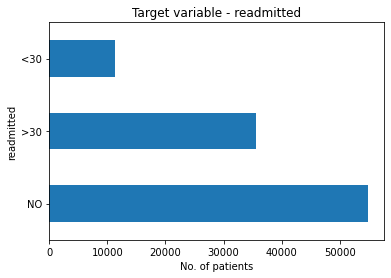

In [769]:
# Plotting target variable - 'readmitted'
d_data['readmitted'].value_counts().plot(kind='barh')
plt.title('Target variable - readmitted')
plt.xlabel('No. of patients')
plt.ylabel('readmitted')
plt.show()

Recalling the aim of the project,

**"We need to find attributes that will help in predicting the patient readmission in the hospital"**

Looking at the target variable: **'readmitted'**

Three different entries we can see,
* 'NO' - not readmitted
* '>30' - readmitted after 30 days
* '<30' - readmitted within 30 days

Our key questions are:
* Why large group of people did not get readmitted? 
* What attributes helped them not to get readmitted? What medications they taken?
* Why some group of people got readmitted within 30 days?

We can explore the remaining variables left from the data wrangling and can find which is useful...

### Exploring variables - race, gender

We can check the distribution of people from different races surveyed here.

**Race**

In [770]:
# Checking race column
d_data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

'?' mentioned as a race, that can be combined into 'Other', since we do not know what race it is.

In [771]:
# Converting '?' into 'Other'
d_data['race'] = d_data['race'].str.replace('?', 'Other')

In [772]:
# Checking race column again
d_data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64

Now '?' marked entries merged with 'Other' column. Lookign at the result, most of the patients were 'Caucasian', we can check this in terms of percentage.

In [773]:
# Calculating percentage of each race
d_data.race.value_counts() / len(d_data.race) * 100

Caucasian          74.780618
AfricanAmerican    18.877195
Other               3.710582
Hispanic            2.001710
Asian               0.629895
Name: race, dtype: float64

* Around 74% of the surveyed patients were 'Caucasian', 
* Secondly 18% patients are 'AfricanAmerican'. 
* 'Asian' are the lowest in the list. 

**Gender**

Checking the gender column to see the male and female distribution

In [774]:
# Checking gender column in terms of percentage
d_data['gender'].value_counts() / len(d_data.gender) * 100

Female    53.760208
Male      46.239792
Name: gender, dtype: float64

This is roughly a good distribution. Because both men and women entries share around 50% each. So, there is no much imbalance of one gender. We can also see which gender is more prone to get redmitted later.

## Do all of them are diabetic? - we need only diabetic people

Before we investigate further, do all the people in the data really have diabetes? Because, there is a chance our data may contain other people who also visited hospital, but they may not have diabetes. So including normal people in analysis may create bias in our study. 

To confirm each patient have diabetes or not, we can use the 'Diabetes Medications' column to check, whether doctor prescribed diabetes medicines to the patient or not.
* If - 'Yes' - they are Diabetic
* If - 'No' - They are Normal 

In [775]:
# Checking 'diabetesMed' column
d_data['diabetesMed'].value_counts()

Yes    78361
No     23402
Name: diabetesMed, dtype: int64

* 23402 people did not prescribed with diabetes medication. 

So, if we are predicting the diabetes readmission, including people who do not have diabetes, that will not make any sense. So, we can create a separate dataframe with only diabetes people.

**Dataframe with only diabetes patients**

In [776]:
# Creating new dataframe with only diabetes people
Diabetes = d_data[d_data['diabetesMed']=='Yes']
Diabetes.shape

(78361, 49)

### Distribution of number of lab tests, procedures & medications

Now we have only diabetes people data, we can focus on below columns to check the distribution of 'readmitted' people in each variable.

**Columns to check:**
* Number of lab procedures
* Number of procedures (other than lab procedures)
* Number of medications
* Change of medications

**Number of lab procedures**

Does more lab tests performed on the readmitted people? Let's check

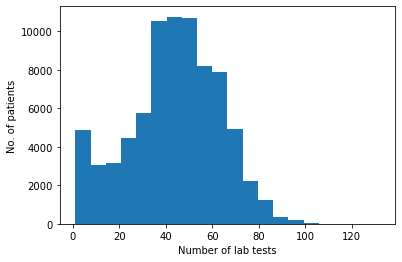

In [777]:
# Frequency distribution - number of lab procedures
plt.hist(Diabetes['num_lab_procedures'], bins=20)
plt.xlabel('Number of lab tests')
plt.ylabel('No. of patients')
plt.show()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,9111.0,44.371309,19.404812,1.0,33.0,45.0,58.0,132.0
>30,28318.0,44.063281,19.653414,1.0,33.0,45.0,58.0,113.0
NO,40932.0,42.824270,20.025009,1.0,31.0,44.0,57.0,121.0


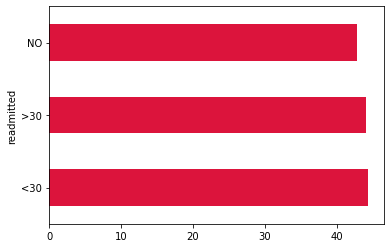

In [778]:
# Grouping the lab procedures by readmitted column
num_lab = Diabetes.groupby('readmitted')['num_lab_procedures'].describe()
num_lab['mean'].plot(kind='barh', ylabel='Avg. No. of tests per patient', color='crimson')
num_lab

* Mean value of all shows between 42 to 44 tests per patient. 

That says both **readmitted** and **not readmitted** patients undergone same number of tests. This column may not be useful.

**Number of procedures (other than lab tests)**

Do readmitted people undergone more procedures?

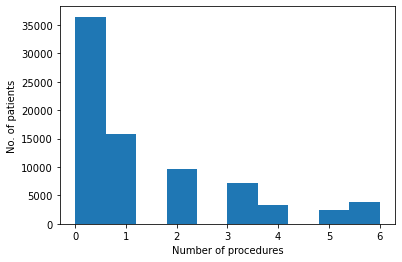

In [779]:
# Frequency distribution - number of procedures
plt.hist(Diabetes['num_procedures'], bins=10)
plt.xlabel('Number of procedures')
plt.ylabel('No. of patients')
plt.show()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,9111.0,1.292065,1.663643,0.0,0.0,1.0,2.0,6.0
>30,28318.0,1.231867,1.666595,0.0,0.0,1.0,2.0,6.0
NO,40932.0,1.412684,1.755755,0.0,0.0,1.0,2.0,6.0


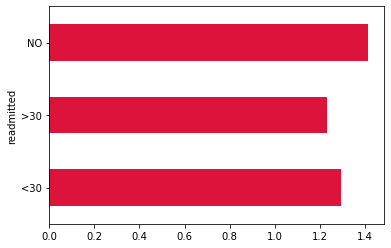

In [780]:
# Grouping the other procedures by readmitted column
num_pro = Diabetes.groupby('readmitted')['num_procedures'].describe()
num_pro['mean'].plot(kind='barh', ylabel='Avg. No. of procedures per patient', color='crimson')
num_pro

* Mean value shows approx. 1 procedure per patient performed in both readmitted and not readmitted group. 

So this column also not useful.

**Number of medications**

Checking the number of medications column. Do particular group taken more medications?

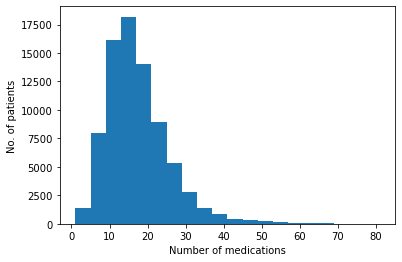

In [781]:
# Frequency distribution - num of medications
plt.hist(Diabetes['num_medications'], bins=20)
plt.xlabel('Number of medications')
plt.ylabel('No. of patients')
plt.show()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,9111.0,17.585117,8.201508,2.0,12.0,16.0,22.0,81.0
>30,28318.0,16.935341,7.643038,1.0,12.0,16.0,21.0,70.0
NO,40932.0,16.630973,8.641586,1.0,11.0,15.0,21.0,79.0


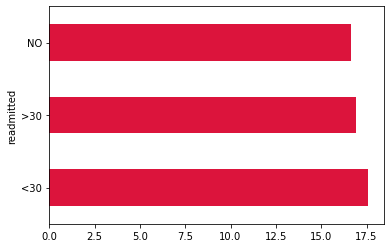

In [782]:
# Grouping the num of medications by readmitted column
num_med = Diabetes.groupby('readmitted')['num_medications'].describe()
num_med['mean'].plot(kind='barh', ylabel='Avg. No. of medicines per patient', color='crimson')
num_med

* Average number of medications taken by both group lies very close around 16-17 medicines per patient. 

So this column may not help. But it will be important to see what medicines each patient taken or not taken. That may be helpful.

**Change of medications**

Before investigating each medicine, let's see whether doctor suggested to change medication that helped particular group.

In [783]:
# Checking 'change' column
Diabetes['change'].value_counts()

Ch    47009
No    31352
Name: change, dtype: int64

'Ch' refers the change of medication here. Let's change it as 'Yes' for easy understanding.

In [784]:
# Replacing 'Ch' into 'Yes' in change column
Diabetes['change'] = Diabetes['change'].str.replace('Ch', 'Yes')

In [785]:
# Now checking the change column in terms of percentage
Diabetes['change'].value_counts() / len(Diabetes.change) * 100

Yes    59.990301
No     40.009699
Name: change, dtype: float64

* Over 60% of the diabetes people asked to change medication. Did it helped them to not get readmitted?

This change of medication outputs for entire patients. But,

* If one group of people asked to change medication - did it help them prevent readmission?
* If one group asked not to change medication - is it the reason they got readmitted?

We can check how many from readmitted and non-readmitted group got change of medication.

In [786]:
# Splitting readmitted and not readmitted patients into two datframes to understand better
no_admission = Diabetes[Diabetes['readmitted']=='NO']
readmitted = Diabetes[Diabetes['readmitted']!='NO']

In [787]:
# Change of medication - in not admitted people
no_admission['change'].value_counts() / len(no_admission.change) * 100

Yes    59.071142
No     40.928858
Name: change, dtype: float64

In [788]:
# Change of medication - in readmitted people
readmitted['change'].value_counts() / len(readmitted.change) * 100

Yes    60.995485
No     39.004515
Name: change, dtype: float64

* 59% - not readmitted patients given change in medication
* 61%  - readmitted patients also given change in medication.

So, there is no great difference, but we can explore what medicines given to each group. That may tell some story.

### Diabetes medications - which medicines helped patients not to get readmitted?

Our data contains 24 different medicines as features - each categorized into four answers.
* Up - medicine prescribed, but to **increase in dose**
* Down - medicine prescribed, but to **decrease in dose**
* Steady - medicine prescribed, but **no change in dose**
* No - medicine **not prescribed**

We can check each medicine and their prescription level between readmitted and not-readmitted patients.

With that, we can address the questions,

* what medicines not-readmitted people taken?
* what medicines readmitted people did not take?

This will help to identify the right medicines which can help them to avoid getting readmitted.

In [789]:
# Calling info to check all the medicines column
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78361 entries, 1 to 101761
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              78361 non-null  int64 
 1   patient_nbr               78361 non-null  int64 
 2   race                      78361 non-null  object
 3   gender                    78361 non-null  object
 4   age                       78361 non-null  object
 5   admission_type_id         78361 non-null  int64 
 6   discharge_disposition_id  78361 non-null  int64 
 7   admission_source_id       78361 non-null  int64 
 8   time_in_hospital          78361 non-null  int64 
 9   payer_code                78361 non-null  object
 10  medical_specialty         78361 non-null  object
 11  num_lab_procedures        78361 non-null  int64 
 12  num_procedures            78361 non-null  int64 
 13  num_medications           78361 non-null  int64 
 14  number_outpatient    

Column 23 to 45 are the medicines prescribed to the patients. 

## Distribution of medicines in 'readmitted' column

**med_columns**

Listing all the medicines in a variable: med_columns


In [790]:
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

**First medicine - Metformin**

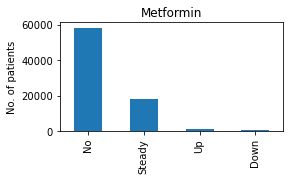

In [791]:
# Let's check the first medicine precribed to the see the distribution
plt.figure(figsize=(4,2))
Diabetes['metformin'].value_counts().plot(kind='bar')
plt.ylabel('No. of patients')
plt.title('Metformin')
plt.show()

**Second medicine - Repaglinide**

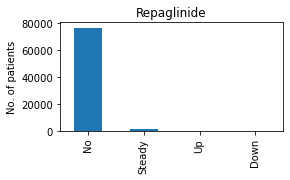

In [792]:
# Let's check the second medicine 
plt.figure(figsize=(4,2))
Diabetes['repaglinide'].value_counts().plot(kind='bar')
plt.ylabel('No. of patients')
plt.title('Repaglinide')
plt.show()

**Visualizing all the medicines at once**

Plotting all the medicines and checking the count of each prescription.

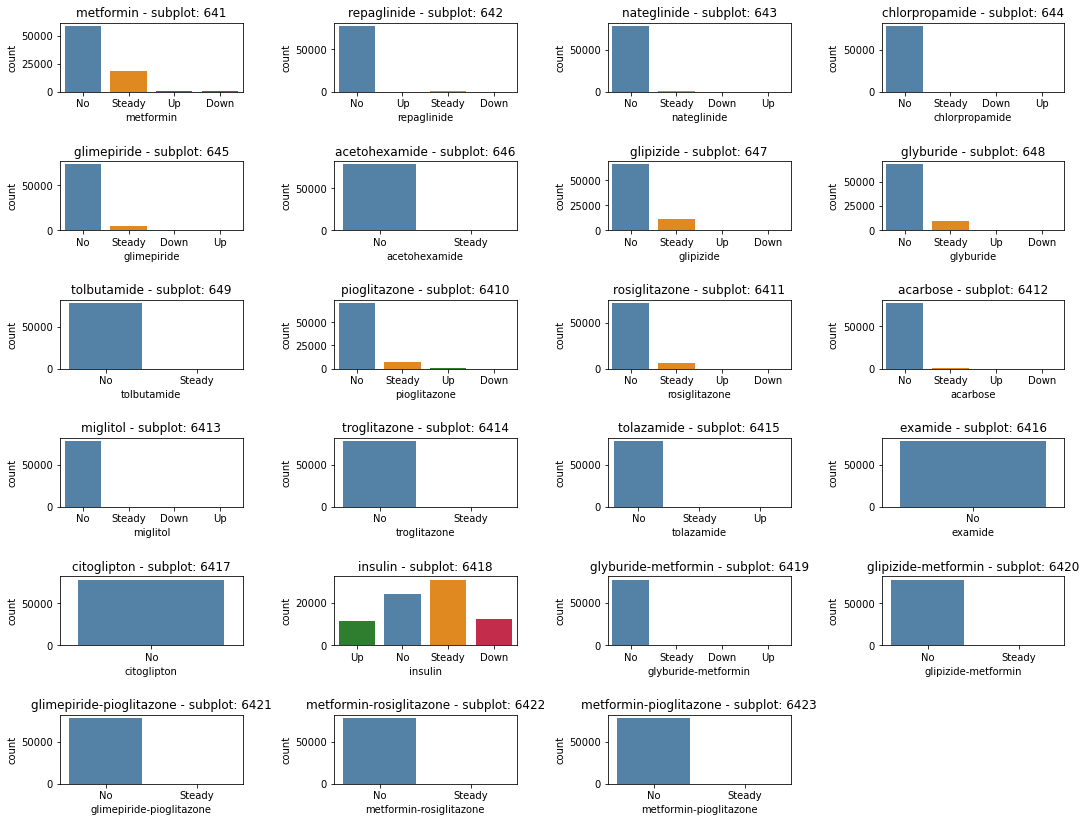

In [793]:
# Creating count plot to visualize all the medicines and their prescription

# Listing all the medicines in variable 'med_columns'
med_columns = med_columns

# Parameters 
a = 6  # nrows
b = 4  # ncolumns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,14))

# Color palette
palette = {'No':'steelblue', 'Steady':'darkorange', 'Up':'forestgreen', 'Down':'crimson'}

for i in med_columns:
    plt.subplot(a,b,c)   
    plt.title('{} - subplot: {}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.countplot(x=i, data=Diabetes, palette=palette)
    plt.subplots_adjust(hspace=1.0, wspace=0.5)
    c = c+1
plt.show()

From the plots we can see, 
* All the medicines has large group of 'No' people - who were not prescribed with the medicine. 
* But some medicines has significant change in their prescription. We can select that for analysis.

**Selected medicines with significant change in their prescription:**

Below medicines have visible change in their prescription level, so these may be helpful for further investigation.

* Insulin
* Metformin
* Glimepiride
* Glipizide
* Glyburide
* Pioglitazone
* Rosiglitazone

But we can gain some more information from these plots:
* By visualizing through a grouped bar chart to see how data is split between readmitted vs not readmitted patients


**Insulin - category plot ("readmitted" vs "not-readmitted"**)

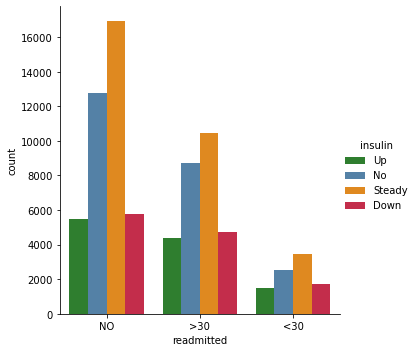

In [794]:
# Insulin - category plot with readmitted column
sns.catplot(x='readmitted', data=Diabetes, kind='count', hue='insulin', order=['NO', '>30', '<30'], palette=palette)
plt.show()

**Our key questions are:**
* what medicines readmitted people did not take? or
* what medicines not-readmitted people taken that helped them?

If we see insulin graph **(Steady & Up)** dose, clearly it says,
* Not readmitted ('NO') group - More number of patients taken insulin
* Readmitted after 30 days ('>30') - Moderate number of patients taken insulin
* Readmitted within 30 days - very less number of patients taken insulin

More number of patients taken insulin - hence it may helped them to avoid readmission. So, insulin is an important feature in predicting readmission of patients.

**Categorizing all the selected medicines and their prescription level**

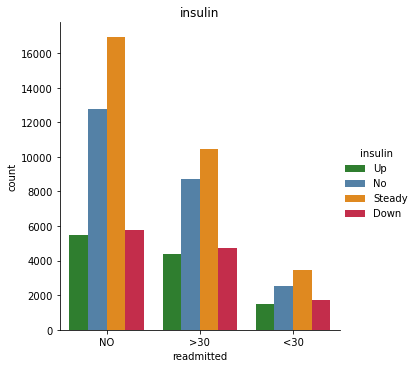

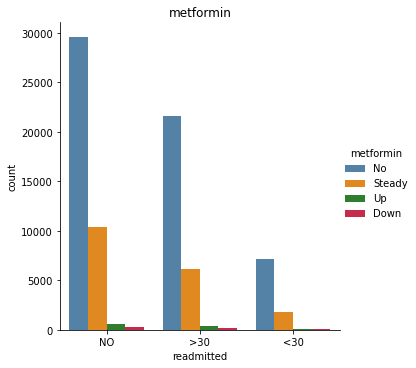

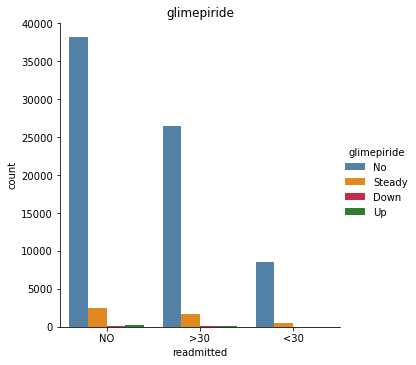

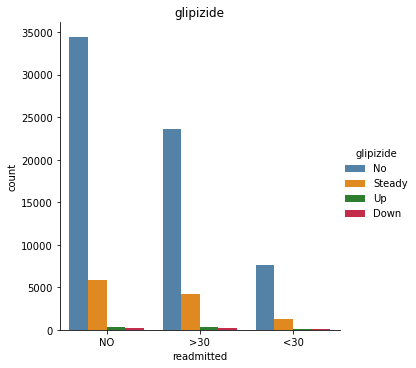

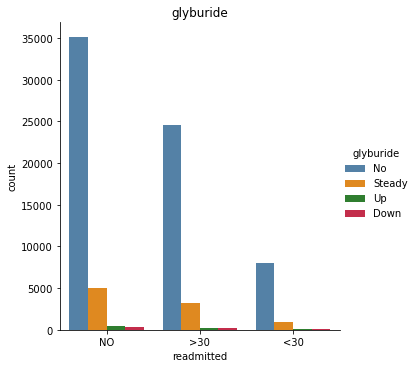

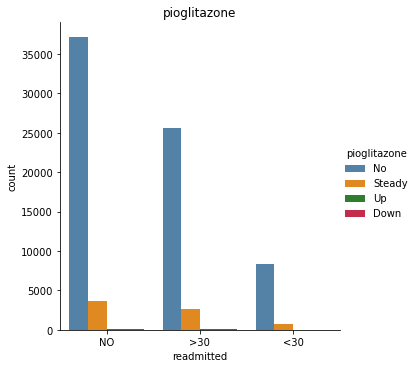

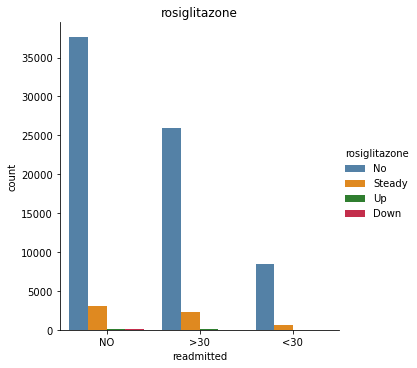

In [795]:
# Creating a list to contain all the selected medicines
med_select = ['insulin', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone']

for j in med_select:
    sns.catplot(x='readmitted', data=Diabetes, kind='count', hue=j, order=['NO', '>30', '<30'], palette=palette)
    plt.title(j)
plt.show()

From the plots, we can see huge difference between 'readmitted' and 'not-readmitted' group of patients.

In all the medicines, we can observe the **'Steady'** dose levels.
* more number of people taken the medicine - but they did not get readmitted ('NO')
* less number of people taken the medicine - but they all got readmitted

Possibly, more people taken the medicine positively reflected so they did not readmitted again. These medicines and prescription levels may be good features - **if a patient taken these medicines, there is a high chance he/she may not get readmitted.**

### Distribution of 'time in hospital' between readmitted & not-readmitted group

Which group has more patients spent time at hospital?

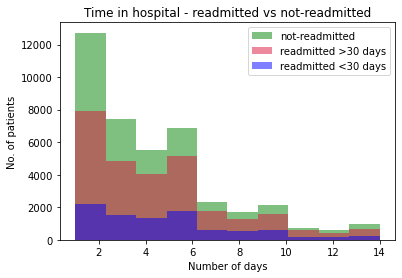

In [796]:
fig1, ax = plt.subplots()
ax = plt.hist(Diabetes[Diabetes['readmitted']=='NO']['time_in_hospital'], bins=10, alpha=0.5, color='green', label='not-readmitted')
ax = plt.hist(Diabetes[Diabetes['readmitted']== '>30']['time_in_hospital'], bins=10, alpha=0.5, color='crimson', label='readmitted >30 days')
ax = plt.hist(Diabetes[Diabetes['readmitted']== '<30']['time_in_hospital'], bins=10, alpha=0.5, color='blue', label='readmitted <30 days')
plt.xlabel('Number of days')
plt.ylabel('No. of patients')
plt.title('Time in hospital - readmitted vs not-readmitted')
plt.legend()
plt.show()

* Most number of patients from not-readmitted group spent less time in hospital - large distribution seen in the left
* Moderate number of patients from readmitted after >30 days group
* Low number of patients see at the bottom who actually readmitted within <30 days

## Who is more prone to get readmitted - Male or Female?

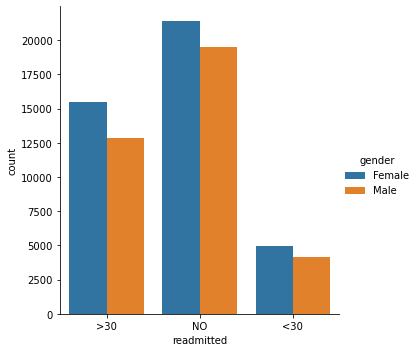

In [797]:
# Plotting the male & female distribution within readmitted 
sns.catplot(x='readmitted', data=Diabetes, kind='count', hue='gender')
plt.show()

From the plot, **Female** count slightly high in all categories of readmitted column. But not significant to say they are prone to get readmitted.

## Other variables
### Admission type: Emergency or elective admission?

This feature displays at what circumstance patient got admitted.
* Emergency / Urgent
* Elective - pre-arranged admission

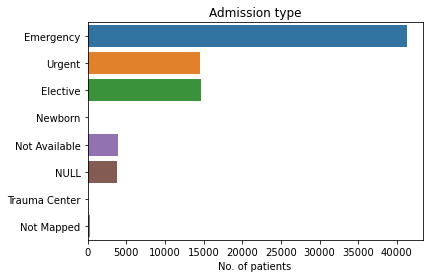

In [798]:
# Admission type
adm_type = Diabetes['admission_type_id'].value_counts().sort_index()

# Plotting barplot
x = adm_type.values
y = adm_type.index
ticks = [0,1,2,3,4,5,6,7]
labels = ['Emergency', 'Urgent', 'Elective', 'Newborn', 'Not Available', 'NULL', 'Trauma Center', 'Not Mapped']

plt.figure()
sns.barplot(x=x, y=y, orient='h')
plt.xlabel('No. of patients')
plt.yticks(ticks, labels)
plt.title('Admission type')
plt.show()

* Large number of patients took emergency admission. 
* Urgent & elective admission has equal number of patients

## Checking the class imbalance in target variable

In [799]:
class_ = Diabetes['readmitted'].value_counts() / len(Diabetes.readmitted)*100
print('Not-readmitted class:', class_['NO'], '%')
print('Readmitted class:', class_['>30'] + class_['<30'], '%')

Not-readmitted class: 52.235168004492024 %
Readmitted class: 47.76483199550797 %


Both readmitted and not-readmitted class have more or less equal data. So, there is no class imbalance.

## Summary

* We have inspected all the important features
* We found a list of medicines shown significant change in prescribed dose.
* Some medicines were taken by large people in the not-readmitted group that may be helped them to avoid readmission. So these may be useful features when developing the model.
* Other features such as number of medications prescribed, lab tests, procedures - on average had equal number per patient.
* Admission type - large group of people made emergency admission
* Among different races - caucasians & african-american were the most number of patients in the data.


#### Saving the data

In [800]:
# saving the data to - Diabetes_EDA.csv
datapath = 'data/'
save_file(Diabetes, 'Diabetes_EDA.csv', datapath)

Writing file.  "data/Diabetes_EDA.csv"
